In [7]:
import numpy as np
import pandas as pd
df =pd.read_excel("employee_salary_analysis.xlsx")
df

,Department,EmployeeID,Salary,YearsOfExperience,Age
0,HR,101,50000,2,25
1,HR,102,52000,2,26
2,IT,201,80000,5,30
3,IT,202,90000,6,28
4,Finance,301,70000,3,35
5,Finance,302,72000,3,36
6,HR,103,51000,2,27
7,IT,203,85000,5,29
8,Finance,303,71000,4,34


In [23]:
# identify numerical columns
numerical_cols=df.select_dtypes(include=[int, float]).columns
desc_stats=df[numerical_cols].agg(['mean','median','std']).T
desc_stats['mode']=df[numerical_cols].mode().iloc[0]
print(desc_stats)

                           mean   median           std     mode
EmployeeID           202.000000    202.0     86.606870    101.0
Salary             69000.000000  71000.0  15024.979201  50000.0
YearsOfExperience      3.555556      3.0      1.509231      2.0
Age                   30.000000     29.0      4.062019     25.0


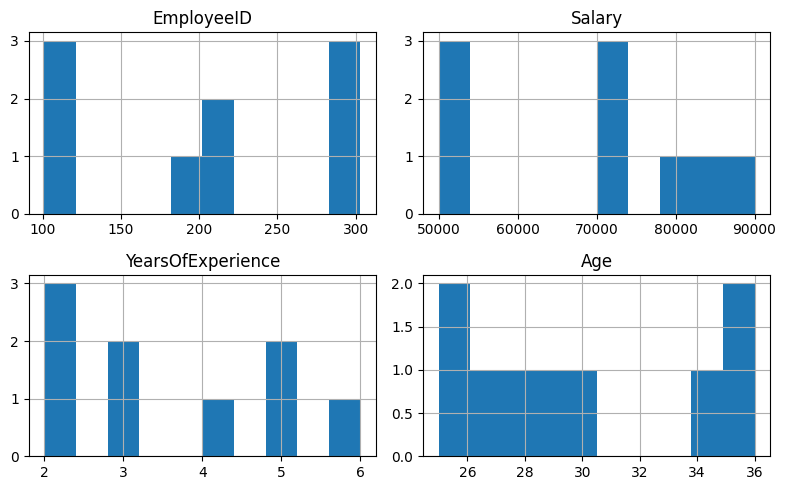

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

df[numerical_cols].hist(figsize=(8,5), bins=10)
plt.tight_layout()
plt.show()

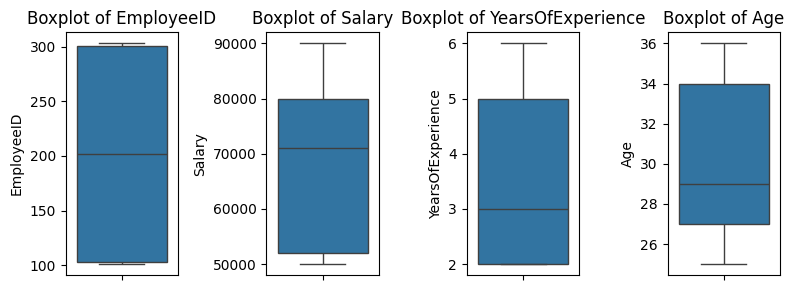

In [36]:
plt.figure(figsize=(8, 3))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

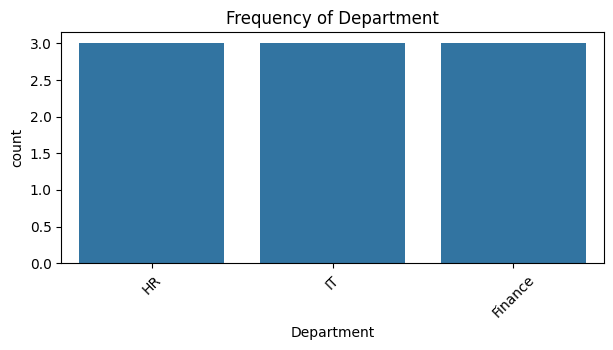

In [38]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(7, 3))
    sns.countplot(data=df, x=col)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[numerical_cols])
standardized_df = pd.DataFrame(standardized_data, columns=numerical_cols)

# Before and after comparison
print("Original mean:\n", df[numerical_cols].mean())
print("Standardized mean:\n", standardized_df.mean())


Original mean:
 EmployeeID             202.000000
Salary               69000.000000
YearsOfExperience        3.555556
Age                     30.000000
dtype: float64
Standardized mean:
 EmployeeID           0.000000e+00
Salary               3.700743e-17
YearsOfExperience    1.418618e-16
Age                  4.934325e-17
dtype: float64


In [43]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,EmployeeID,Salary,YearsOfExperience,Age,Department_HR,Department_IT
0,101,50000,2,25,True,False
1,102,52000,2,26,True,False
2,201,80000,5,30,False,True
3,202,90000,6,28,False,True
4,301,70000,3,35,False,False
